#Plant diseases prediction
In this project I build a convolutional neural network to detect disease in potato. Potato usually have 2 types of diseases early blight and late blight which can be detected by expert examining of leaves.
the dataset consist of 2152 photo with 3 classes (healthy, early blight, late blight).

##Downloading the Dataset

In [ ]:
! kaggle datasets download arjuntejaswi/plant-village
!unzip '/content/plant-village.zip'

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [ ]:
!find /content/PlantVillage -mindepth 1 -type d -name 'Potato*'
!find /content/PlantVillage -mindepth 1 -type d ! -name 'Potato*' -print0 | xargs -0 rm -rf


/content/PlantVillage/Potato___healthy
/content/PlantVillage/Potato___Late_blight
/content/PlantVillage/Potato___Early_blight


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:

for batch, labels in dataset.take(1):

    print(batch[0].shape)
    print(labels.numpy())

(256, 256, 3)
[0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 2 1 2 0 1 1 2 0 0 1 1]


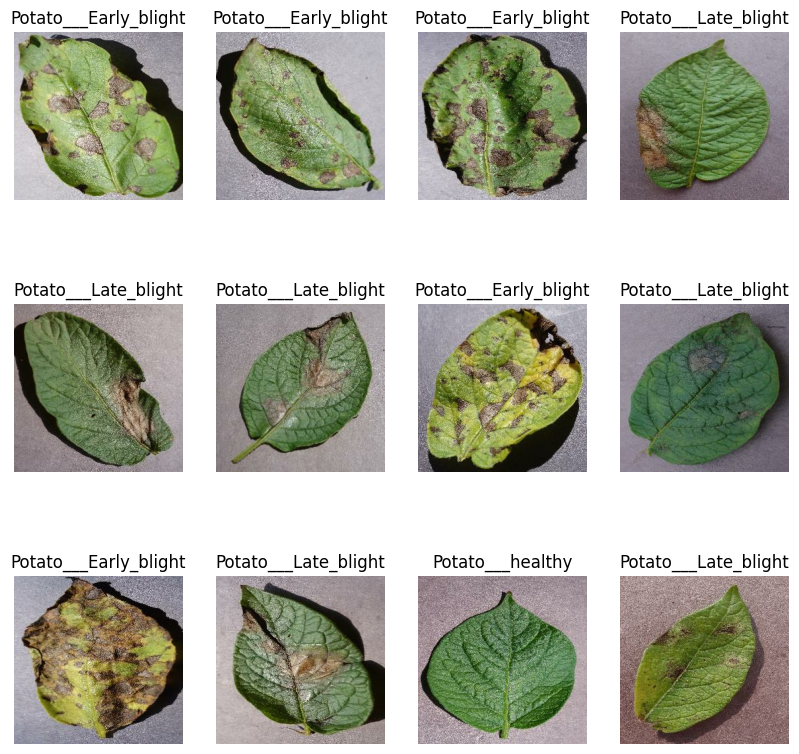

In [ ]:
plt.figure(figsize = (10,10))
for batch, labels in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

## Model building

In [ ]:
def train_test_val_split(dataset , train_split = 0.8, test_split = 0.1, val_split = 0.1,shuffle = True):
    if shuffle:
        dataset = dataset.shuffle(1000,seed = 12)

    dataset_size = len(dataset)
    train_size = int(train_split * dataset_size) #how many batches for training
    val_size = int(val_split * dataset_size ) #how many batches for validation

    #get the data
    train_data = dataset.take(train_size)
    val_data = dataset.skip(train_size).take(val_size)
    test_data = dataset.skip(train_size).skip(val_size)


    return train_data,val_data,test_data

In [ ]:
train_data,val_data,test_data = train_test_val_split(dataset)

In [ ]:
print("Length of training data batches: "+str(len(train_data)))
print("Length of validation data batches: "+str(len(val_data)))
print("Length of testin data batches: "+str(len(test_data)))

Length of training data batches: 54
Length of validation data batches: 6
Length of testin data batches: 8


In [ ]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)

])

In [ ]:
#data augmentaion layers

data_augmentaion = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)

])

In [ ]:
#model building:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
n_classes = 3
model  = tf.keras.Sequential([
    resize_rescale,
    #data_augmentaion,
    layers.Conv2D(32,kernel_size = (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size = (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])


In [ ]:
model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(
optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_data,
    batch_size = BATCH_SIZE,
    validation_data = val_data,
    epochs = 30
)

Epoch 1/30
54/54 [==============================] - 15s 107ms/step - loss: 0.9276 - accuracy: 0.4707 - val_loss: 0.8938 - val_accuracy: 0.3802
Epoch 2/30
54/54 [==============================] - 7s 104ms/step - loss: 0.8787 - accuracy: 0.5053 - val_loss: 1.0360 - val_accuracy: 0.3690
Epoch 3/30
54/54 [==============================] - 7s 93ms/step - loss: 0.7240 - accuracy: 0.6933 - val_loss: 0.5120 - val_accuracy: 0.8385
Epoch 4/30
54/54 [==============================] - 7s 95ms/step - loss: 0.4869 - accuracy: 0.7946 - val_loss: 0.5041 - val_accuracy: 0.7708
Epoch 5/30
54/54 [==============================] - 7s 97ms/step - loss: 0.3490 - accuracy: 0.8592 - val_loss: 0.2814 - val_accuracy: 0.8698
Epoch 6/30
54/54 [==============================] - 7s 74ms/step - loss: 0.3349 - accuracy: 0.8709 - val_loss: 0.2072 - val_accuracy: 0.9323
Epoch 7/30
54/54 [==============================] - 7s 99ms/step - loss: 0.2682 - accuracy: 0.9043 - val_loss: 0.1601 - val_accuracy: 0.9427
Epoch 8/30

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Save the model

In [ ]:
model.save(f'model1')

In [ ]:
model.save(f'potato.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Run on one sample

The true image label is: Potato___Late_blight
1/1 [==============================] - 0s 65ms/step
The predicted image label is: Potato___Late_blight


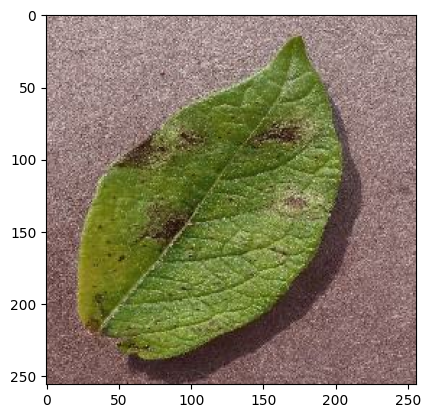

In [ ]:
for image_batch, labels in dataset.take(1):
  image = image_batch[0].numpy().astype('uint8')
  label = labels[0].numpy()

  print("The true image label is: " + str(class_names[label]))
  predictions = model.predict(image_batch)
  print("The predicted image label is: " + str(class_names[np.argmax(predictions[0])]))
  plt.imshow(image)
  plt.axis = 'off'

### Function for inference

In [ ]:
for batch,labels in dataset.take(1):
  print(model.predict(batch[0].numpy().reshape(1,256,256,3))[0])

1/1 [==============================] - 0s 37ms/step
[9.9999940e-01 5.8673896e-07 1.1848760e-13]


In [ ]:
def predict(model, img):
    img_numpy = img.numpy().reshape(1,256,256,3)
    predictions = model.predict(img_numpy)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
for images, labels in test_data.take(1):
  predicted_class, confidence = predict(model, images[i])

(256, 256, 3)
(1, 256, 256, 3)
True
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


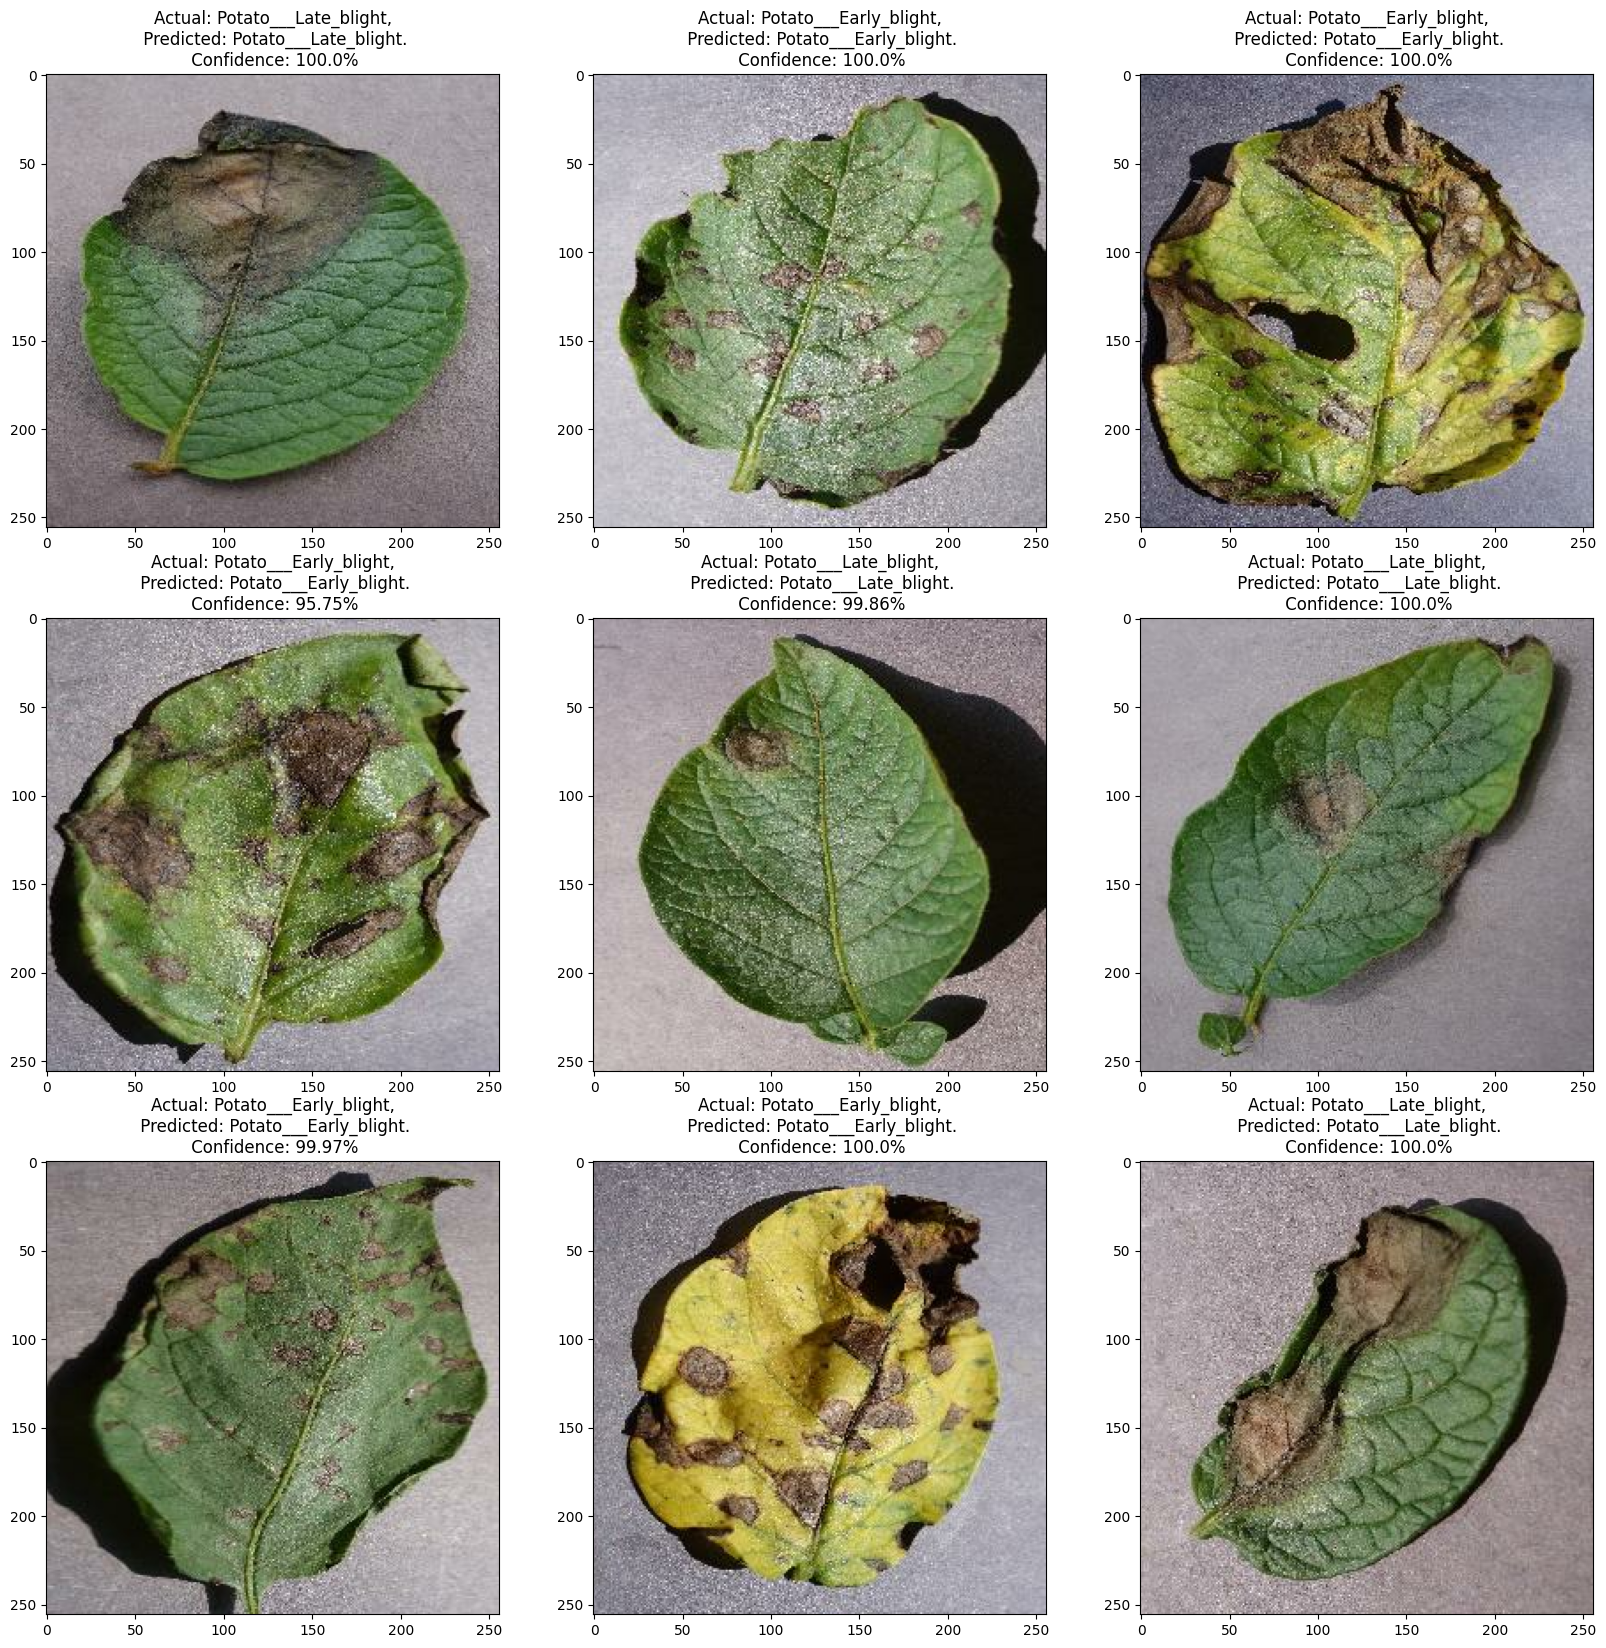

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]
        plt.axis = 'off'
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")